<a href="https://colab.research.google.com/github/PosgradoMNA/actividades-de-aprendizaje-FranciscoMedellin/blob/main/Semana_8_Modulo_05_Notas.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Model Evaluation Module 05
- Francisco Medellin Zertuche 
- A01794044

# Model Evaluation and Refinement

In this module, we are going to talk about model evaluation.

- Model Evaluation
- Over-fitting, Under-fitting and Model Selection - - - Ridge Regression
- Grid Search 
- Answer the Question:
How can you be certain your model works in the real world and performs optimally.

# Model Evaluation

- In-sample evaluation tells us how well our model fits the data already given to train
it.
- Problem?: It does not give us an estimate of how well the trained model can predict new data.
- The solution:Split our data up, 
  - In-sample data or training data to train the model.
  - The rest of the data called test data is used as out-of-sample data. This data is then used to approximate how the model performs in the real world.


Separating data into training and testing sets is an important part of model evaluation.
We use the test data to get an idea how our model will perform in the real world.

When we split a data set, usually the larger portion of data is used for training and a
smaller part is used for testing.

For example, split data set into:
  - we can use 70% of the data for training
  - we then use 30% for testing.
- Build and train the model with a training set
- Use testing set to asses the performance of a predictive model.
- When we have completed testing our model we should use all the data to train the model to get the best performance.

Popular function to split datasets is train_test_split().
- Split data into random train and test subsets.

```
from sklearn.model._selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x_data, y_data, test_size=0.3, randmom_state=0)
```

- test_size:  percentage ofthe data for the testing set. Here it is 30%. 
- The random state is a random seed for random
dataset splitting.

The input parameters y_data is the target variable (in the car appraisal example, it
would be the price), and "x_data", the list of predictor variables. 

In this case, it would be all the other variables in the car data set that we are using to try to predict the price.

## Generalization Performance

- Generalization error is a measure of how well our data does at predicting previously unseen
data.
- The error we obtain using our testing data is an approximation of this error.

In the first figure shows the distribution of the actual values in red compared to the predicted
values from a linear regression in blue.
We see the distributions are somewhat similar.

If we generate the same plot using the test data, we see the distributions are relatively
different.

The difference is due to a generalization error and represents what we see in the real
world.

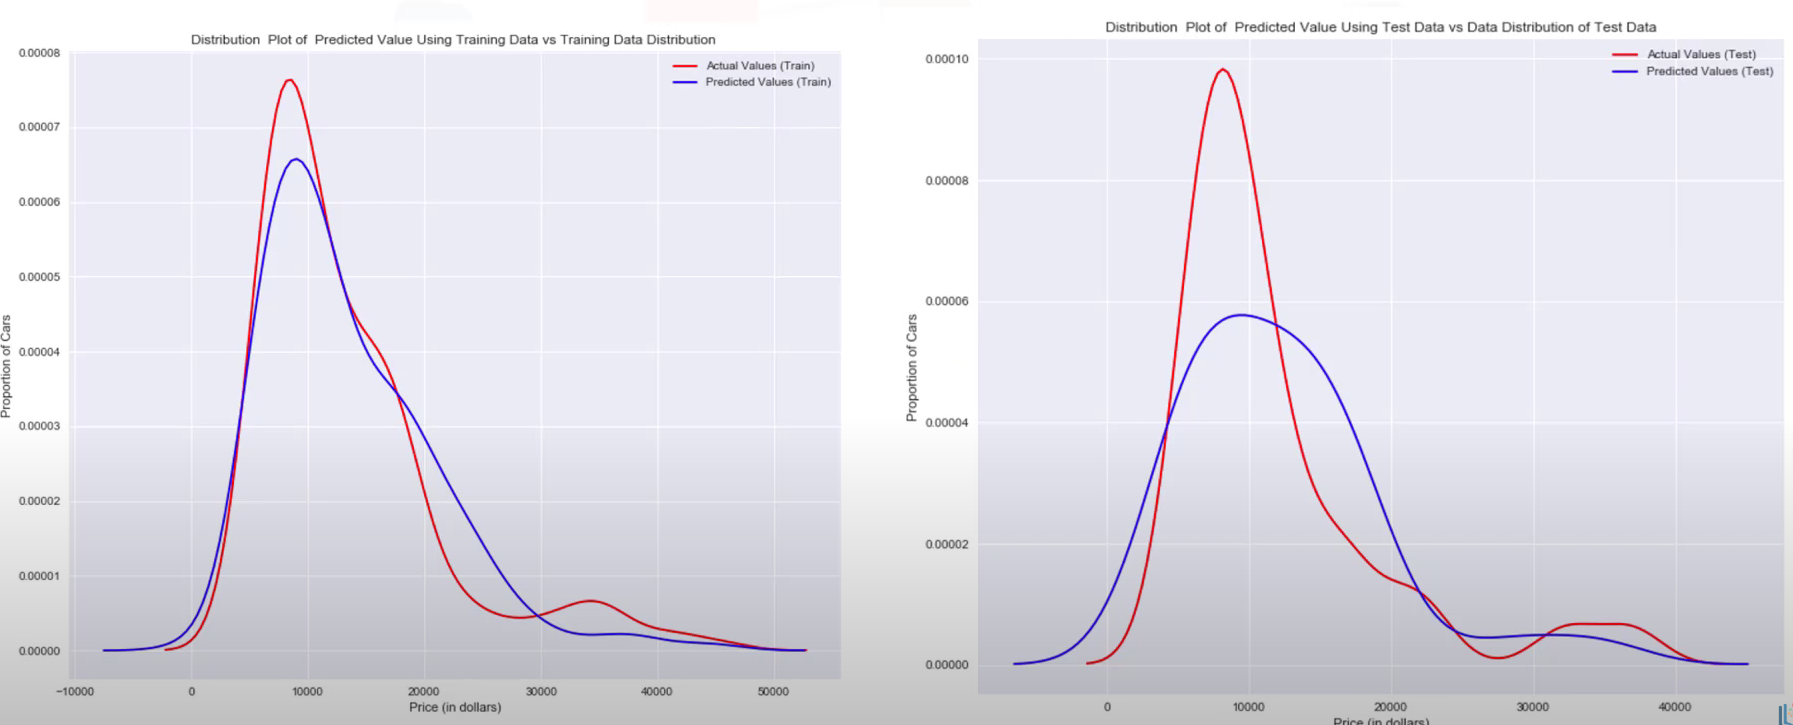

If we take a random sample of the data using 90% of the data for training and 10% for testing.
The first time we experiment we get a good estimate of the training data.

If we training the model with different combination of samples, we also get good result but the results will be different relative to the first time.

Repeating the process the results are relatively close to the Generalization error, but distinct from each other.
Repeating the process, we get good approximation of the generalization error, but the precision is poor i.e., all the results are extremely different from one
another.

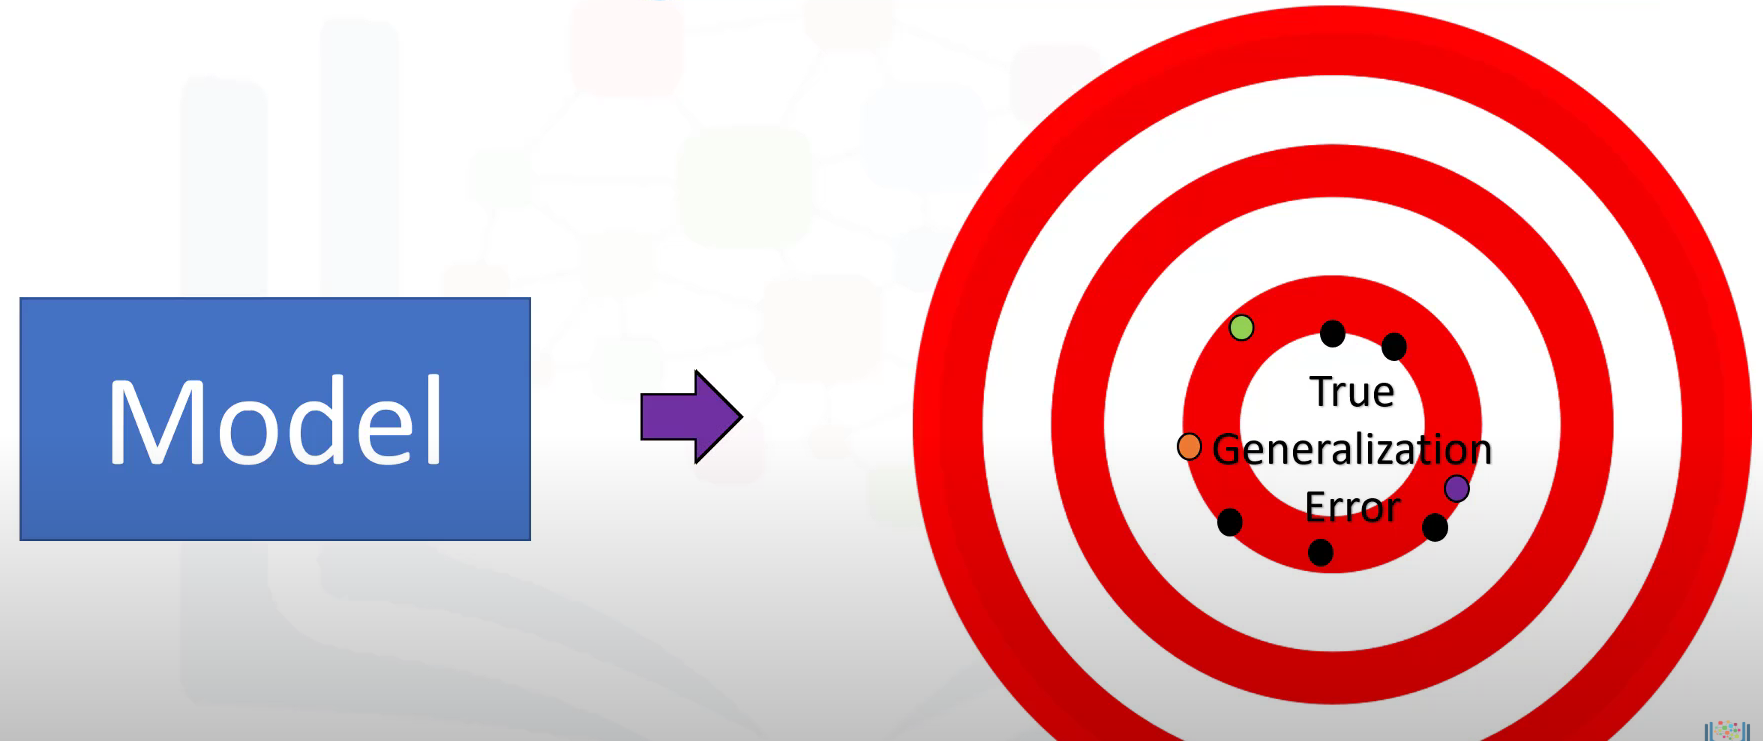

If we use fewer data points to train the model and more to test the model, the accuracy of
the generalization performance will be less, but the model will have good precision.

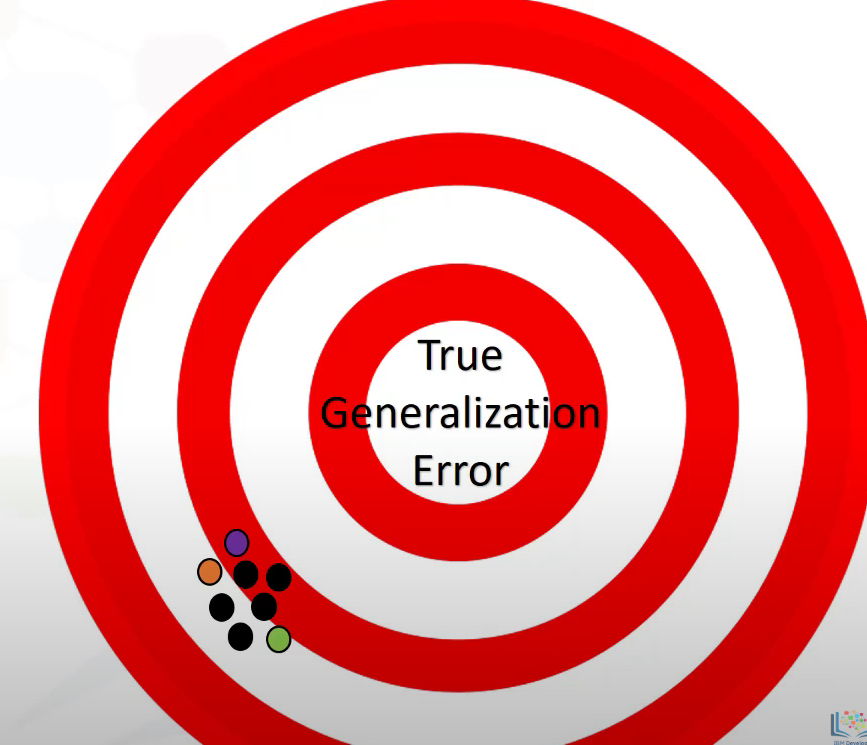

The figure above demonstrates this; all our error estimates are relatively close together,
but they are further away from the true generalization performance.

**To overcome this problem, we use cross validation.**

## Cross Validation

One of the most common out-of-sample evaluation metrics is cross-validation.

More effectuve use of data (each observation is used for both training and testing).

In this method, the **dataset is split into k-equal groups**; each group is referred to as a fold.

**For example 4 folds:**
Some of the folds can be used as a training set, which we use to train the model, and
the remaining parts are used as a test set, which we use to test the model.

<br>

This is repeated until each partition is used for both training and testing.

At the end, we use the average results as the estimate of out-of-sample error. The evaluation metric depends on the model. For example, the R-squared.

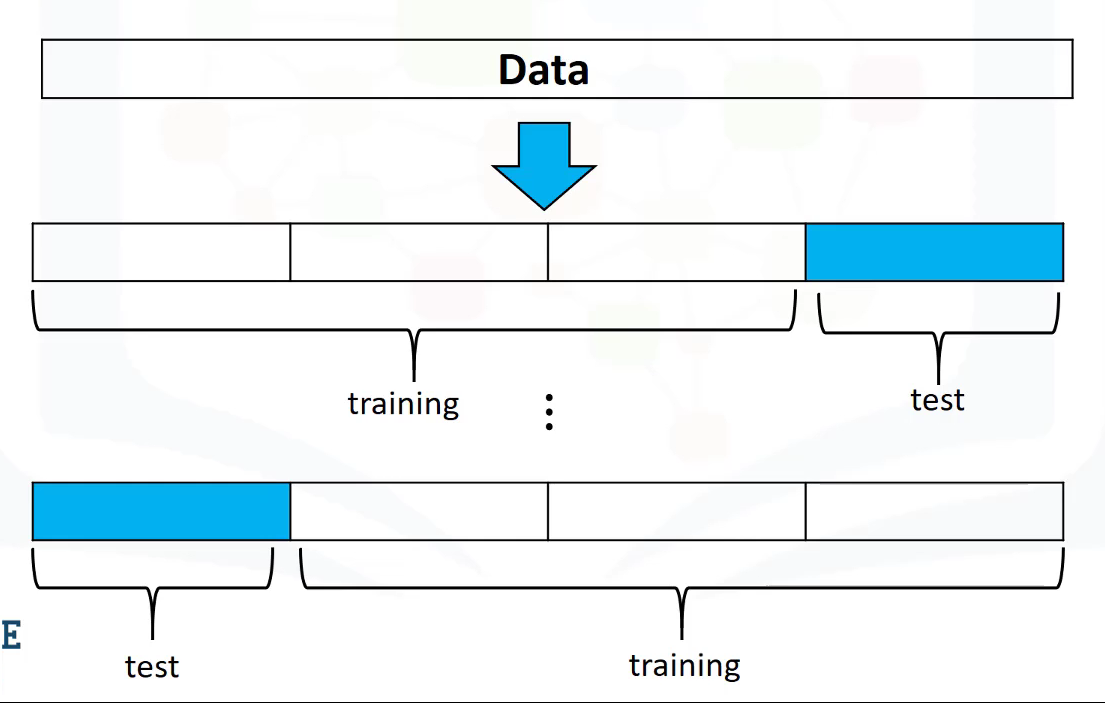

**Function corss_val_score()**<br>
```
from skelarn.model_selection import cross_val_score()

scores = cross_val_score(lr, x_data, y_data, cv = 3)

```
Parameters:
- The first input parameter is the type of model
we are using to do the cross validation. In this example, we initialized a linear regression model or object lr
- The other parameters are x_data, the predictor variable data, and y_data, the target variable
data.
- We can manage the number of partitions with the cv parameter. Here, cv = 3, which means the data set is split into 3 equal partitions.

The function returns an array of scores, one for each partition that was chosen as the
testing set.

We can average the result together to estimate out-of-sample R-squared using the mean function



```
np.mean(scores)
```



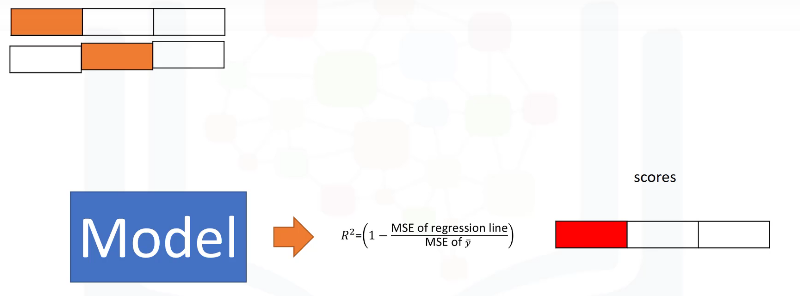

The cross_val_score() function returns a score value to tell us the cross-validation
result.

What if we want a little more information: what if we want to know the actual predicted values supplied by our model before the R squared values are calculated?

To do this corss_val_predict()
```
from sklearn.model_selecction import cross_val_predict
yhat = cross_val_predict(lr2e, x_data, y_data, cv=3)
```

The input parameters are exactly the same as the cross_val_score() function, but
the output is a prediction.

Let's illustrate the process.<br>
- First, we split the data into three folds.
- We use two folds for training, the remaining
fold for testing.
- The model will produce an output, and we will store it in and array.
- We will repeat the process using two folds for training, one for testing.
The model produces an output again.
- Finally, we use the last two folds for training, then we use the testing data.

This final testing fold produces an output.
These predictions are stored in an array.

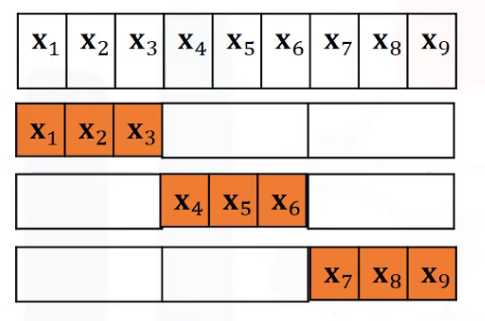

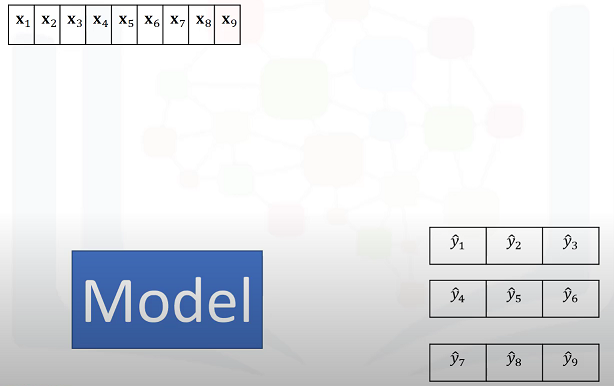

# Overfitting, Underfitting and Model Selection

In this section, we will discuss how to pick the best polynomial order and problems that
arise with selecting the wrong order polynomial.

Consider the following function: we assume the training points come from a polynomial
function plus some noise.
The goal of model selection is to determine the order of the polynomial to provide the
best estimate of the function y x.<br>


If we try and fit the function with a linear function, the line is not complex enough to
fit the data.

As a result, there are many errors.
**This is called under-fitting, where the model is too simple to fit the data.**


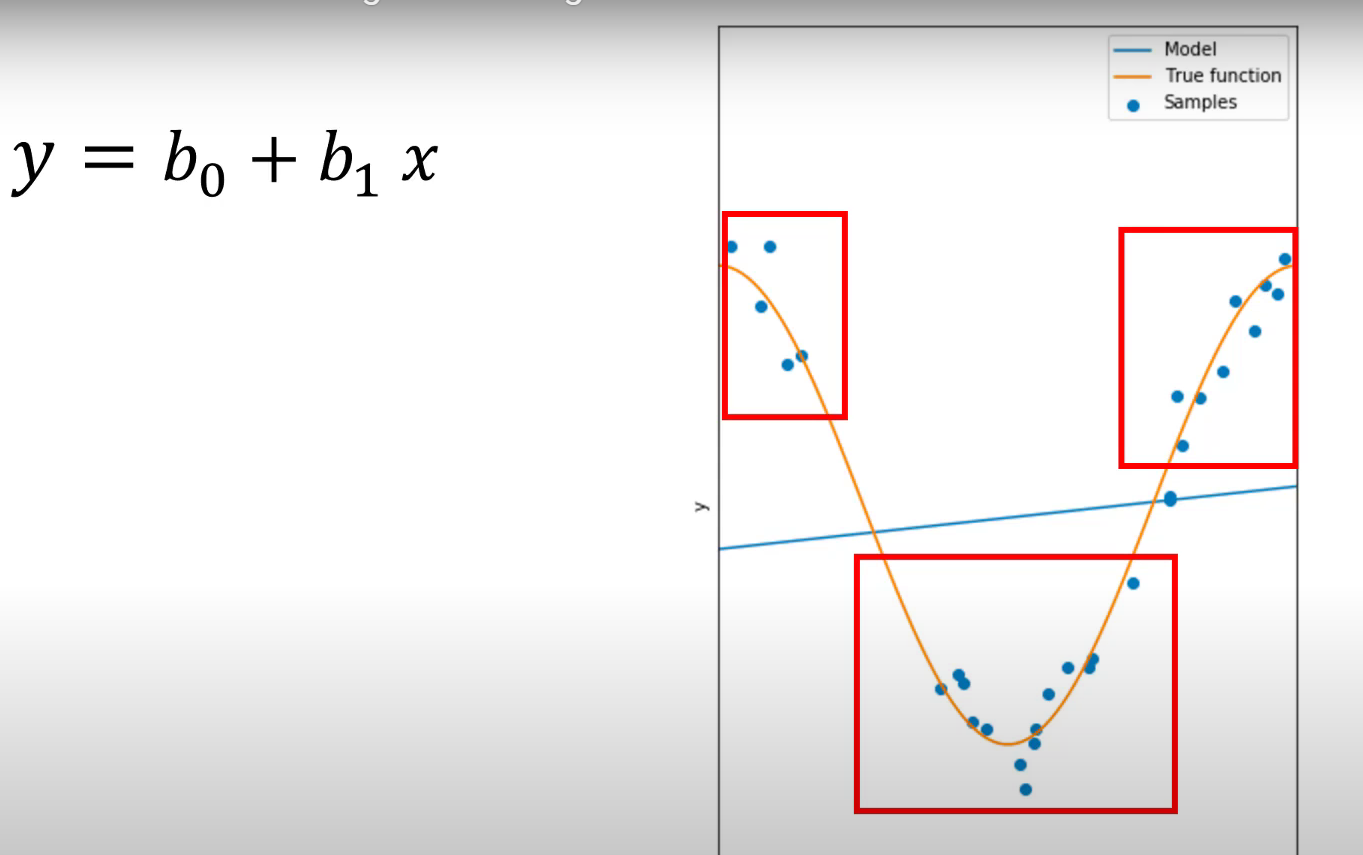

If we increase the order of the polynomial, the model fits better, but the model is still
not flexible enough and exhibits under-fitting.

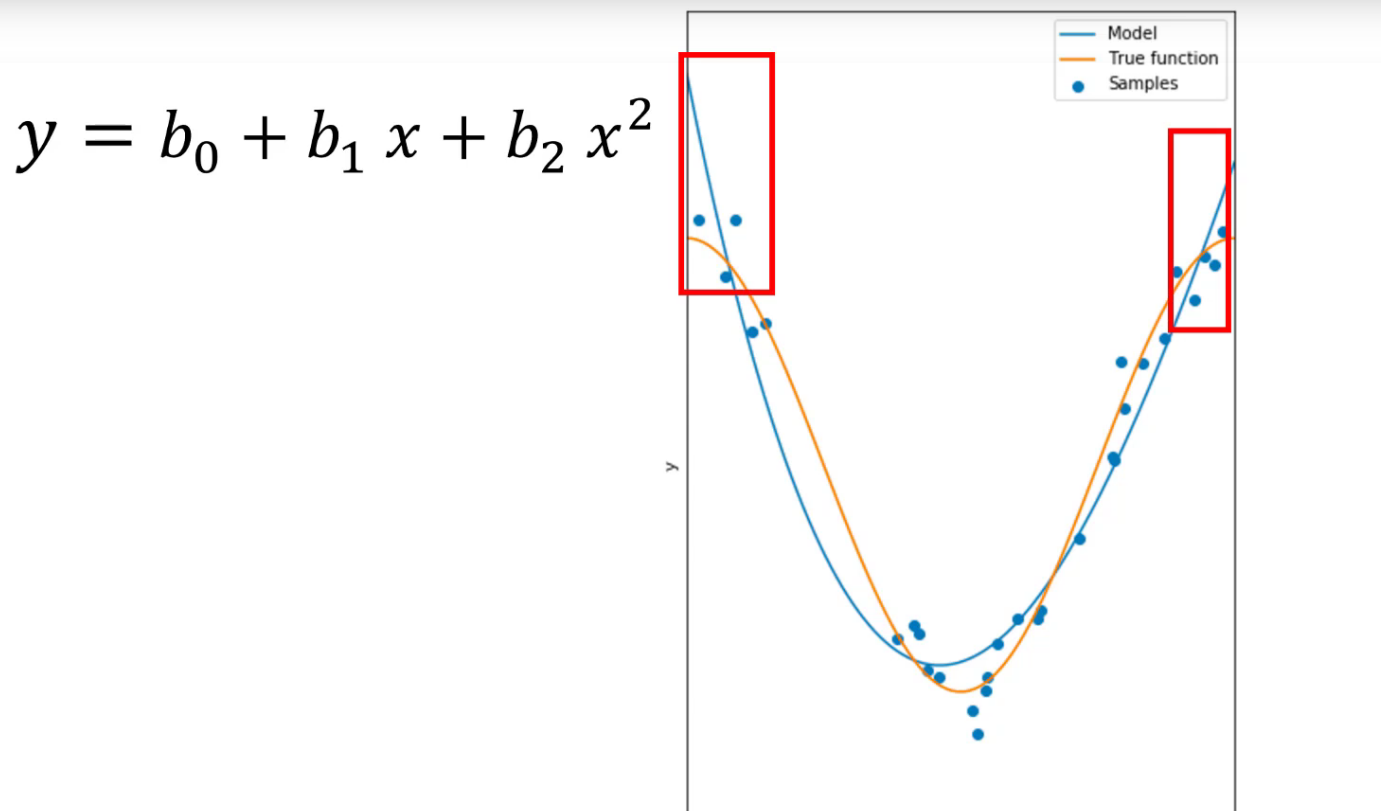

This is an example of the 8th order polynomial used to fit the data; we see the model does
well at fitting the data and estimating the function, even at the inflection points.

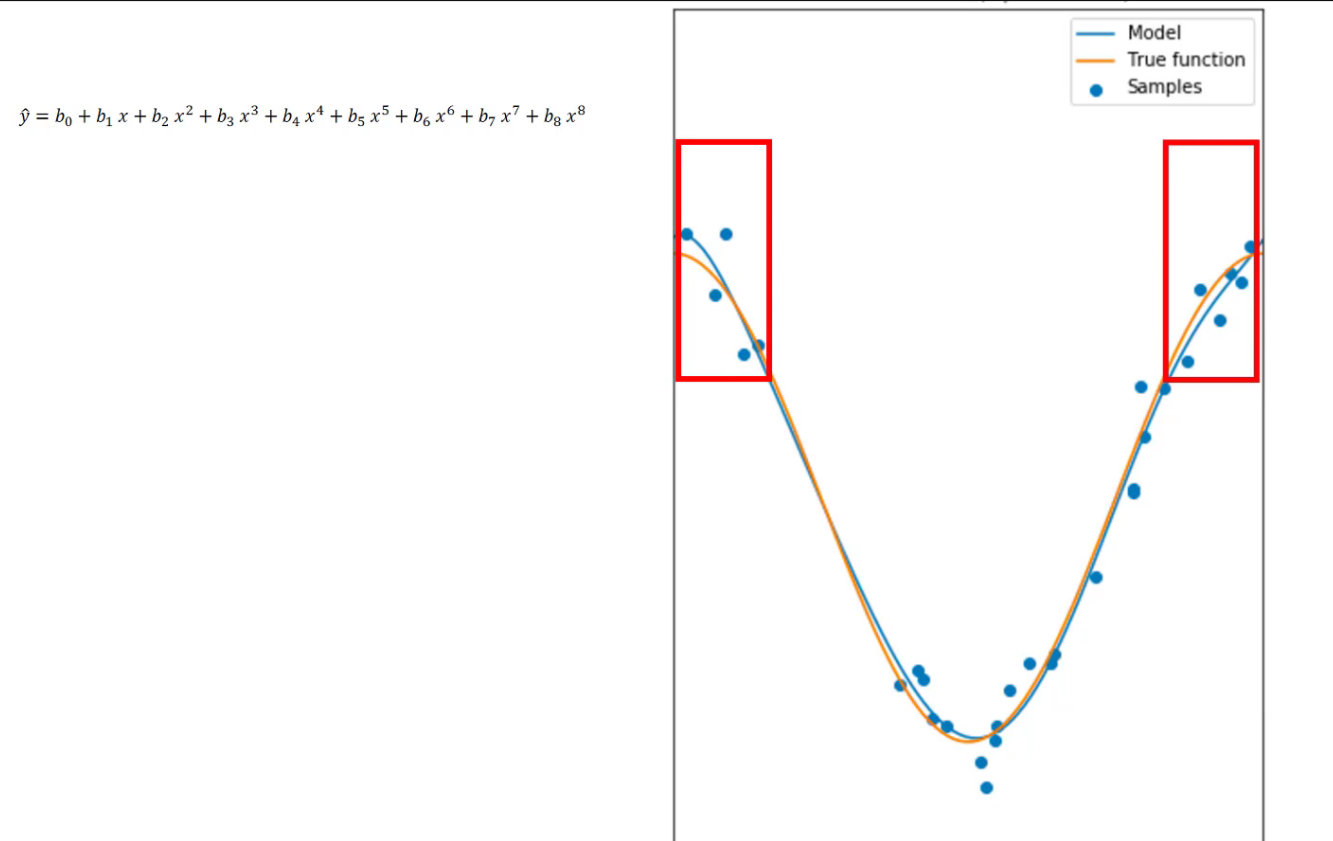

Increasing it to a 16th order polynomial, the model does extremely well at tracking the training points, but performs poorly at estimating the function. <br>

This is especially apparent where there is little training data; the estimated function oscillates not tracking the function.<br>

This is called **over-fitting, where the model is too flexible and fits the noise rather
than the function.**

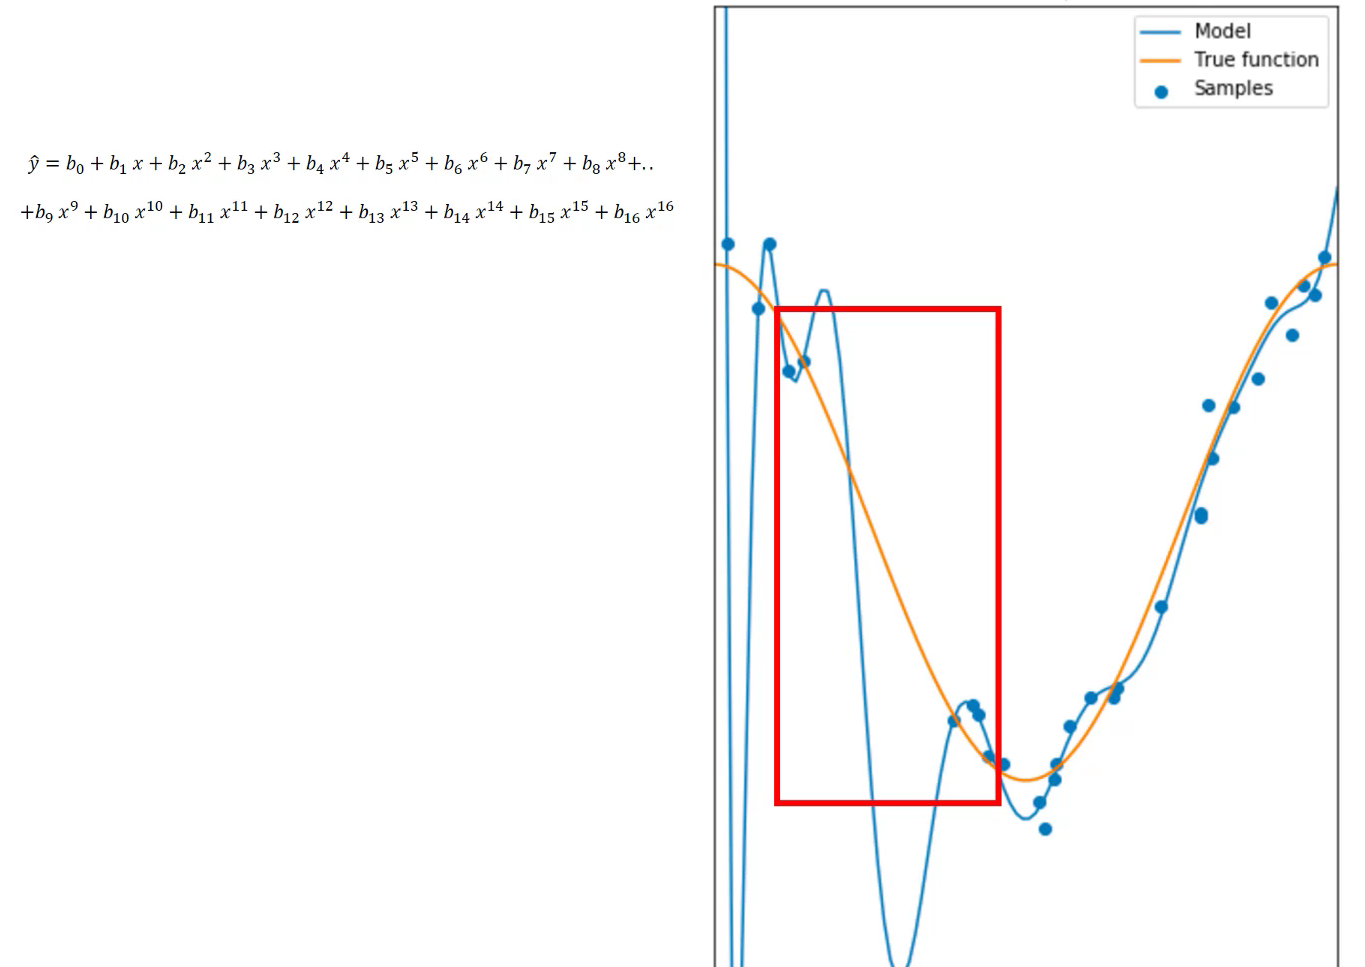

Let's look at a plot of the mean square error for the training and testing set for different
order polynomials.

The horizontal axis represents the order of the polynomial; the vertical axis is the mean
square error.

- The training error decreases with the order of the polynomial.
- The test error is a better means of estimating the error of a polynomial.
- The error decreases till the best order of the polynomial is determined, then the error begins to increase.

We select the order that minimizes the test error, in this case, it was 8.

Anything on the left would be considered under-fitting.
Anything on the right is over-fitting.

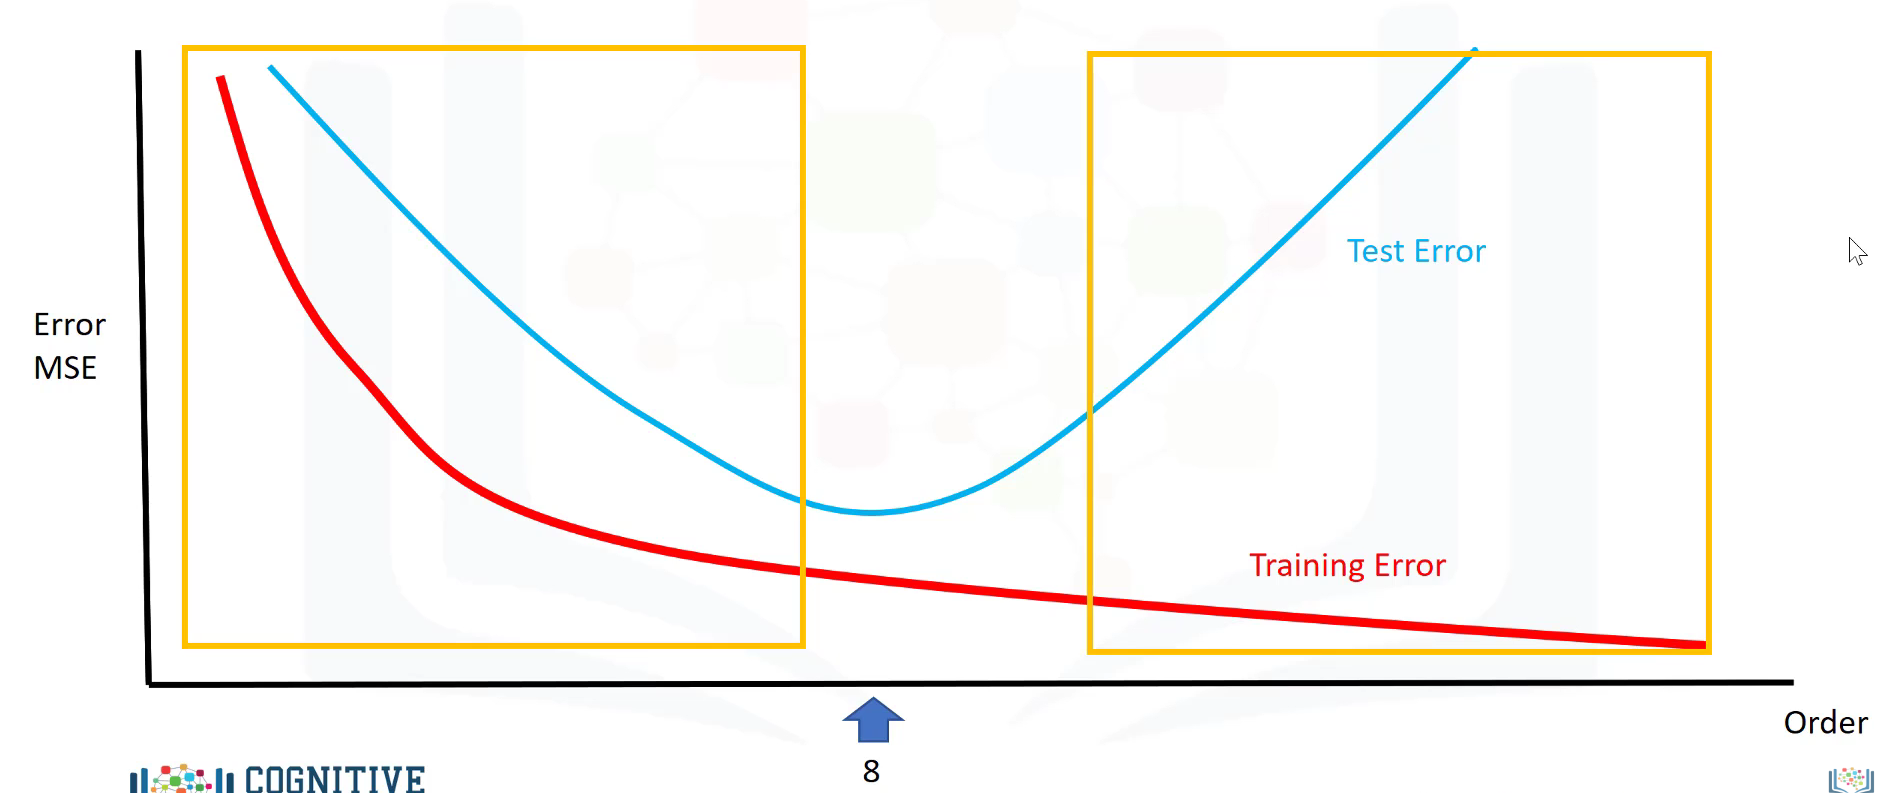

If we select the best order of the polynomial, we will still have some errors, if you recall,
the original expression for the training points.
We see a noise term; this term is one reason for the error.
This is because the noise is random and we can't predict it; this is sometimes referred
to as an irreducible error.

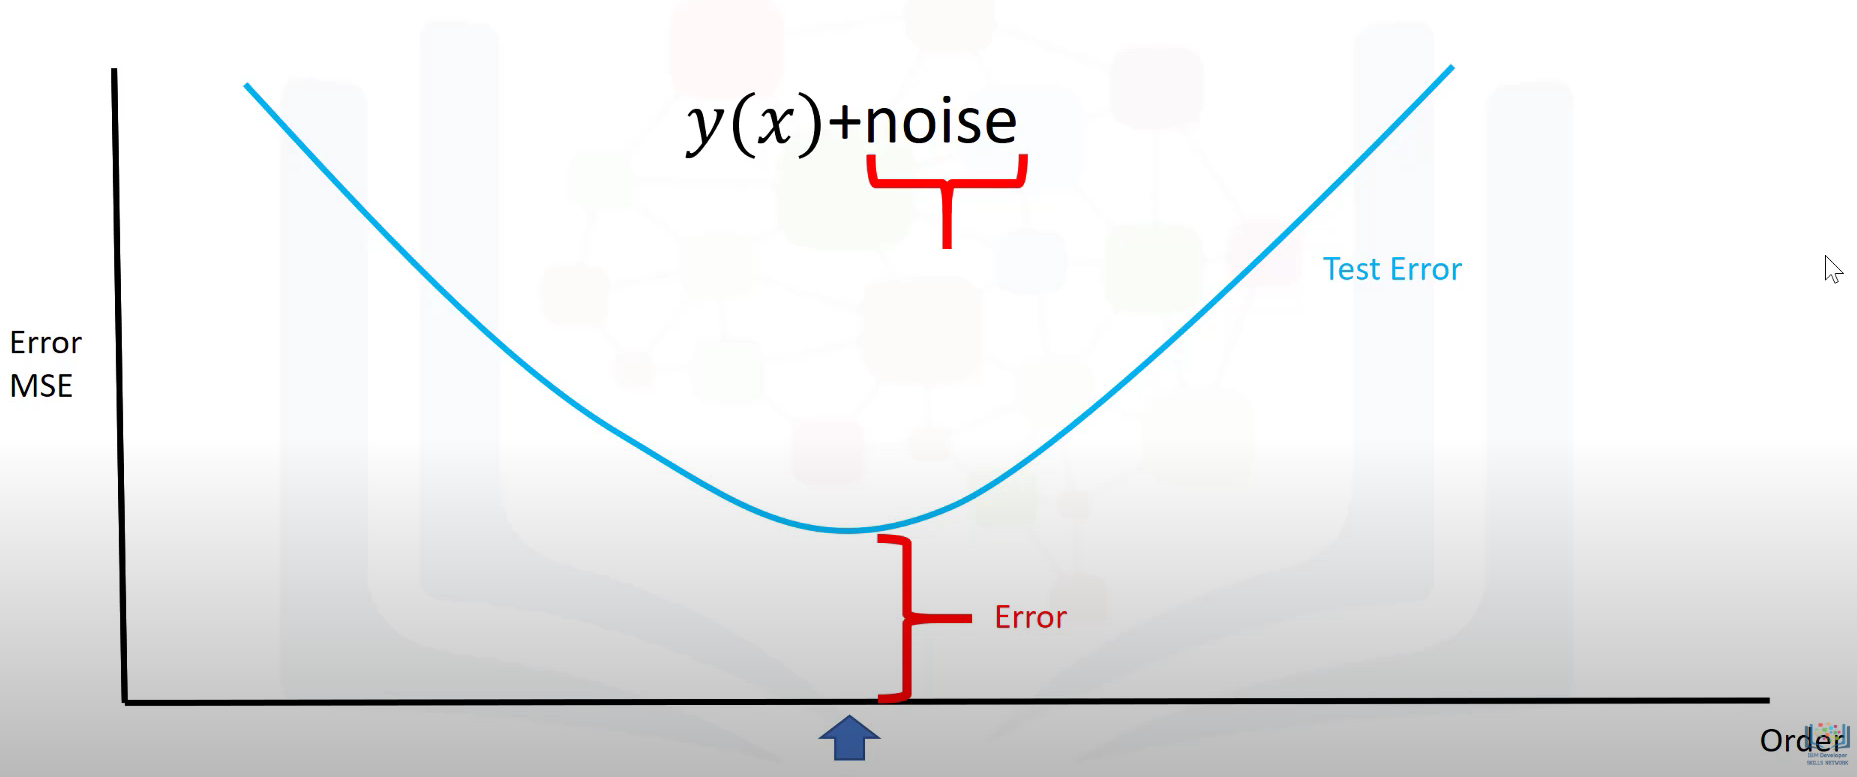

**There are other sources of errors as well.**
For example, our polynomial assumption may be wrong.
Our sample points may have come from a different function.

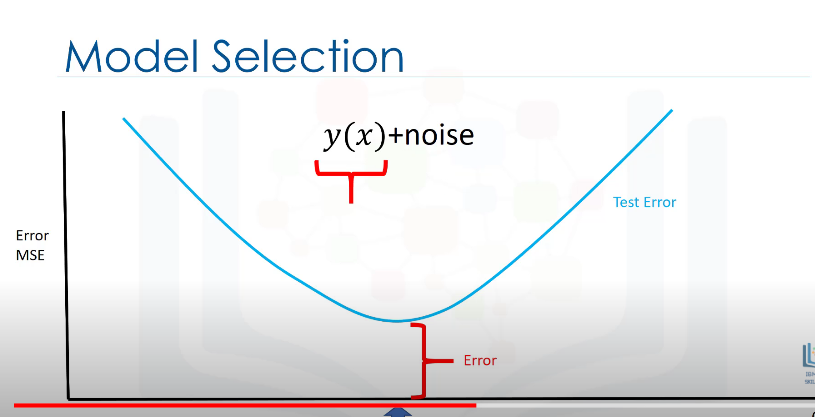

For example, in this plot, the data is generated from a sine wave; the polynomial function
does not do a good job at fitting the sine wave.<br>

For real data, the model may be too difficult to fit, or we may not have the correct type of data to estimate the function.

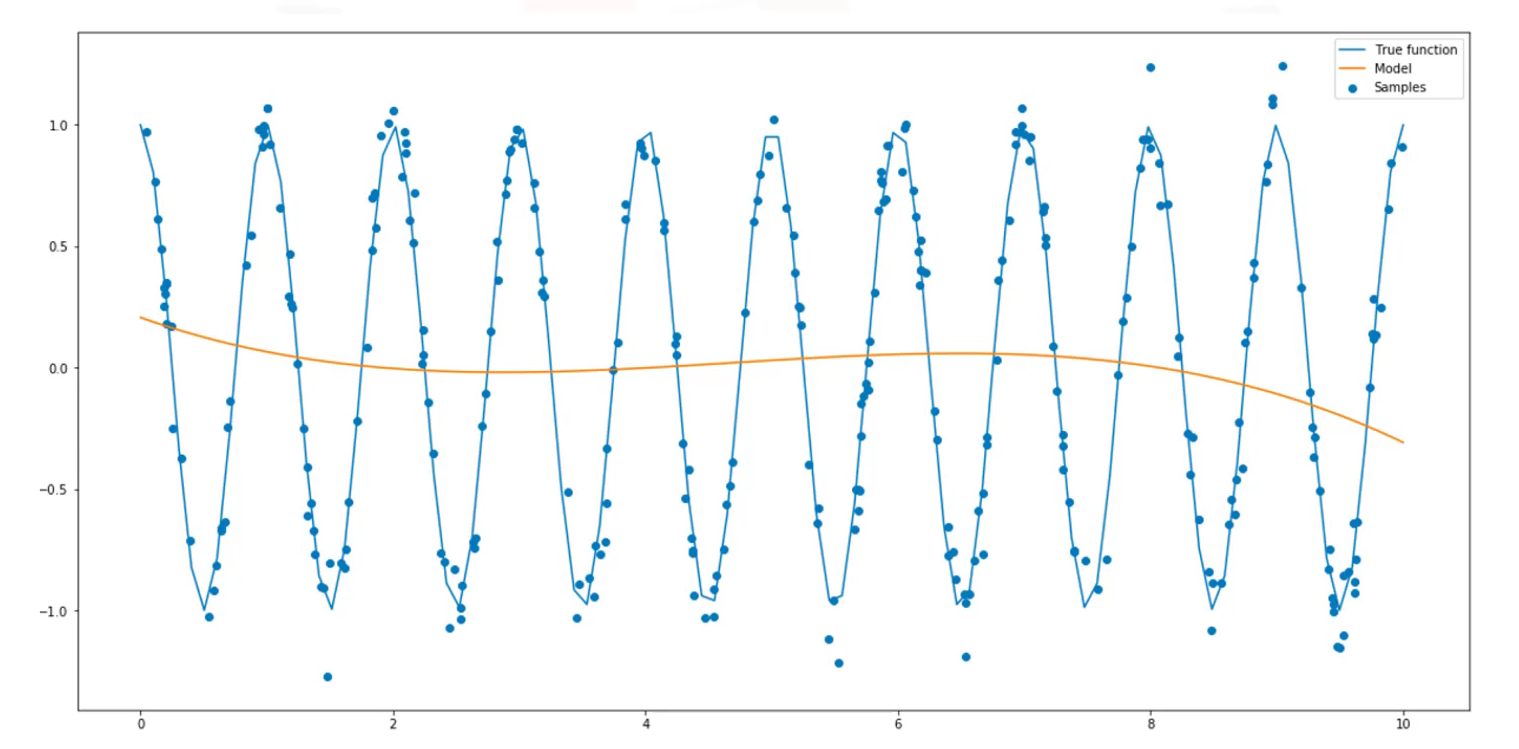

We start with or model predicted functino since frist order until 4th polynomial order an we see the next:
At around 200 horse power, the predicted price suddenly decreases; this seems erroneous.

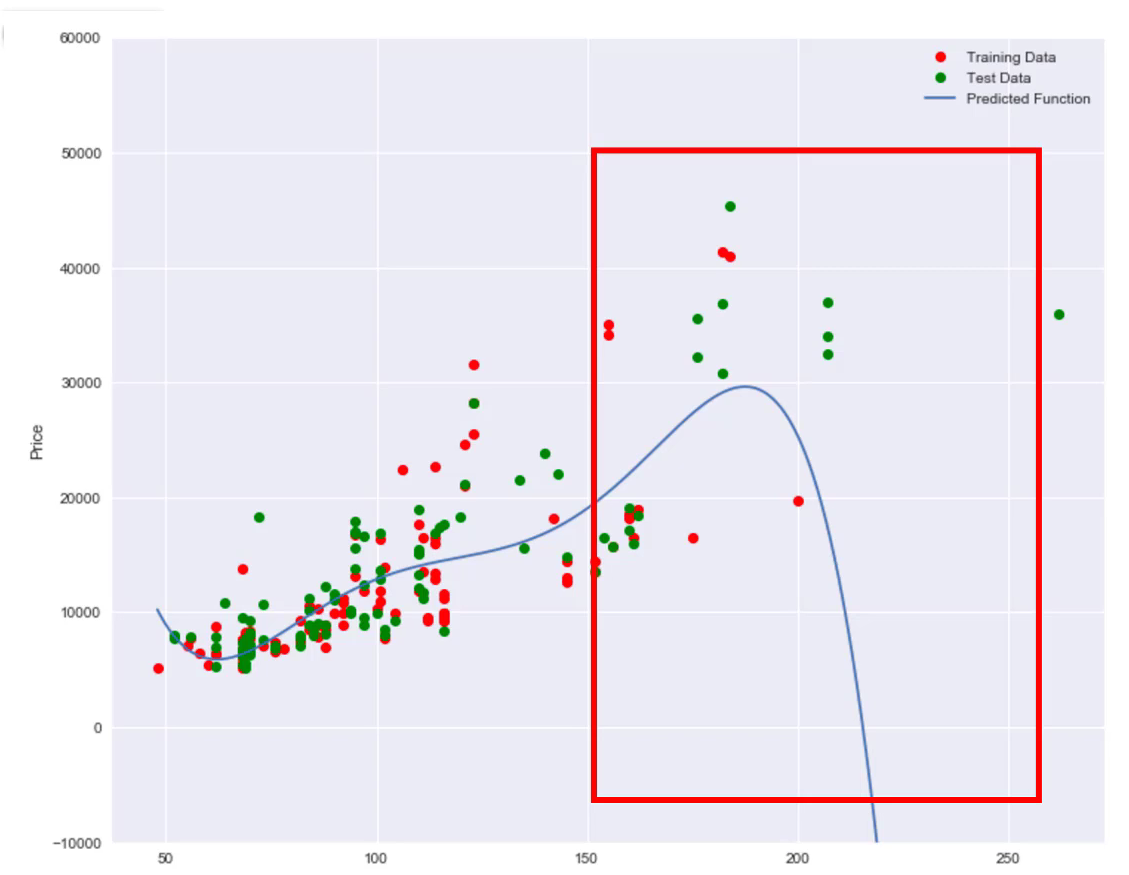

**Let's use R-squared to see if our assumption is correct.**

The following is a plot of the R-squared value, the horizontal axis represents the order of
polynomial models.
The closer the R-squared is to 1, the more accurate the model is.<br>

Here we see the R-squared is optimal when the order of the polynomial is three.

The R-squared drastically decreases when the order is increased to 4, validating our initial
assumption.

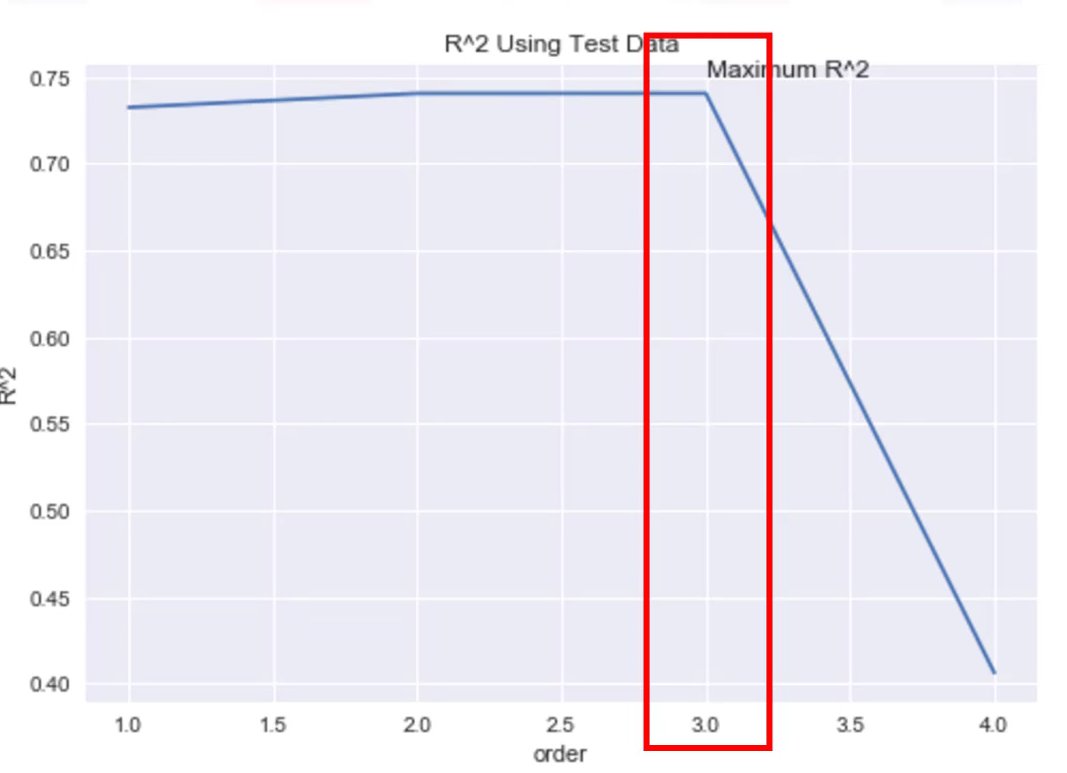

**We can calculate different R-squared values as follows:**

- First, we create an empty list to store the values.
- We create a list containing different polynomial orders.
- We then iterate through the list using a loop. We create a polynomial feature object with
the order of the polynomial as a parameter.
- We transform the training and test data into
a polynomial using the fit transform method.
- We fit the regression model using the transformed
data. 
- Then calculate the R-squared using the
test data and store it in the array.


```
Rsqu_test = []
order = [1,2,3,4]

for n in order:
  pr=PolynomialFeatures(degree=n)
  x_train_pr = pr.fit_transform(x_train[["horsepower"]])
  x_test_pr = pr.fit_transform(x_test[["horsepower"]])
  lr.fit(x_train_pr, y_train)
  Rseu_test.append(lr.score(x_test_pr, y_test))
```

